In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas_datareader import data

In [69]:
data_inicio = '2011-01-01'
data_fim = '2021-09-06'

In [70]:
df = data.DataReader('itub4.sa', 'yahoo', data_inicio, data_fim)
df['data_pregao'] = df.index
df

,High,Low,Open,Close,Volume,Adj Close,data_pregao
Date,,,,,,,
2011-01-03,18.250118,17.963253,18.031555,18.067982,10014663.0,11.556025,2011-01-03
2011-01-04,18.318420,18.031555,18.077089,18.213692,12685182.0,11.649217,2011-01-04
2011-01-05,18.509665,18.004234,18.122623,18.486897,12143831.0,11.823959,2011-01-05
2011-01-06,18.436810,18.031555,18.400381,18.049768,17066720.0,11.544379,2011-01-06
2011-01-07,18.149944,17.512465,18.013342,17.608086,15259728.0,11.261880,2011-01-07
...,...,...,...,...,...,...,...
2021-08-31,31.270000,30.530001,30.629999,30.940001,43607500.0,30.924999,2021-08-31
2021-09-01,31.629999,31.000000,31.059999,31.059999,28784500.0,31.059999,2021-09-01
2021-09-02,30.900000,29.780001,30.889999,29.940001,32547700.0,29.940001,2021-09-02


In [71]:
df['mm5D'] = df['Close'].rolling(5).mean()
df['mm21D'] = df['Close'].rolling(21).mean()
df

,High,Low,Open,Close,Volume,Adj Close,data_pregao,mm5D,mm21D
Date,,,,,,,,,
2011-01-03,18.250118,17.963253,18.031555,18.067982,10014663.0,11.556025,2011-01-03,NaN,NaN
2011-01-04,18.318420,18.031555,18.077089,18.213692,12685182.0,11.649217,2011-01-04,NaN,NaN
2011-01-05,18.509665,18.004234,18.122623,18.486897,12143831.0,11.823959,2011-01-05,NaN,NaN
2011-01-06,18.436810,18.031555,18.400381,18.049768,17066720.0,11.544379,2011-01-06,NaN,NaN
2011-01-07,18.149944,17.512465,18.013342,17.608086,15259728.0,11.261880,2011-01-07,18.085285,NaN
...,...,...,...,...,...,...,...,...,...
2021-08-31,31.270000,30.530001,30.629999,30.940001,43607500.0,30.924999,2021-08-31,30.694000,30.500477
2021-09-01,31.629999,31.000000,31.059999,31.059999,28784500.0,31.059999,2021-09-01,30.708000,30.514286
2021-09-02,30.900000,29.780001,30.889999,29.940001,32547700.0,29.940001,2021-09-02,30.648000,30.515715


In [72]:
df_train = df.copy()

In [73]:
df_train['Close'] = df_train['Close'].shift(-10)

In [74]:
df_train

,High,Low,Open,Close,Volume,Adj Close,data_pregao,mm5D,mm21D
Date,,,,,,,,,
2011-01-03,18.250118,17.963253,18.031555,17.781116,10014663.0,11.556025,2011-01-03,NaN,NaN
2011-01-04,18.318420,18.031555,18.077089,17.553446,12685182.0,11.649217,2011-01-04,NaN,NaN
2011-01-05,18.509665,18.004234,18.122623,17.362202,12143831.0,11.823959,2011-01-05,NaN,NaN
2011-01-06,18.436810,18.031555,18.400381,16.938732,17066720.0,11.544379,2011-01-06,NaN,NaN
2011-01-07,18.149944,17.512465,18.013342,16.943287,15259728.0,11.261880,2011-01-07,18.085285,NaN
...,...,...,...,...,...,...,...,...,...
2021-08-31,31.270000,30.530001,30.629999,NaN,43607500.0,30.924999,2021-08-31,30.694000,30.500477
2021-09-01,31.629999,31.000000,31.059999,NaN,28784500.0,31.059999,2021-09-01,30.708000,30.514286
2021-09-02,30.900000,29.780001,30.889999,NaN,32547700.0,29.940001,2021-09-02,30.648000,30.515715


In [35]:
df_train.dropna(inplace=True)
df_train

,High,Low,Open,Close,Volume,Adj Close,data_pregao,mm5D,mm21D
Date,,,,,,,,,
2017-01-31,15.370000,14.900000,14.990000,15.820000,30807200.0,12.722639,2017-01-31,15.464,15.598095
2017-02-01,15.410000,14.910000,15.260000,15.840000,35977000.0,12.722639,2017-02-01,15.260,15.615238
2017-02-02,15.280000,14.860000,14.990000,15.860000,39306700.0,12.612521,2017-02-02,15.078,15.586191
2017-02-03,15.340000,14.770000,14.920000,15.610000,40213400.0,12.993692,2017-02-03,15.022,15.578572
2017-02-06,15.470000,14.950000,15.380000,15.920000,29686500.0,12.671816,2017-02-06,15.046,15.540952
...,...,...,...,...,...,...,...,...,...
2021-08-17,27.629999,26.450001,26.840000,27.190001,93623700.0,27.030001,2021-08-17,28.558,27.608571
2021-08-18,27.309999,26.650000,27.030001,27.040001,86103100.0,26.790001,2021-08-18,28.182,27.618095
2021-08-19,26.870001,26.129999,26.260000,26.600000,80808200.0,26.639999,2021-08-19,27.690,27.602857


In [36]:
df_train = df_train.reset_index(drop=True)
df_train.index = df_train['data_pregao']
df_train

,High,Low,Open,Close,Volume,Adj Close,data_pregao,mm5D,mm21D
data_pregao,,,,,,,,,
2017-01-31,15.370000,14.900000,14.990000,15.820000,30807200.0,12.722639,2017-01-31,15.464,15.598095
2017-02-01,15.410000,14.910000,15.260000,15.840000,35977000.0,12.722639,2017-02-01,15.260,15.615238
2017-02-02,15.280000,14.860000,14.990000,15.860000,39306700.0,12.612521,2017-02-02,15.078,15.586191
2017-02-03,15.340000,14.770000,14.920000,15.610000,40213400.0,12.993692,2017-02-03,15.022,15.578572
2017-02-06,15.470000,14.950000,15.380000,15.920000,29686500.0,12.671816,2017-02-06,15.046,15.540952
...,...,...,...,...,...,...,...,...,...
2021-08-17,27.629999,26.450001,26.840000,27.190001,93623700.0,27.030001,2021-08-17,28.558,27.608571
2021-08-18,27.309999,26.650000,27.030001,27.040001,86103100.0,26.790001,2021-08-18,28.182,27.618095
2021-08-19,26.870001,26.129999,26.260000,26.600000,80808200.0,26.639999,2021-08-19,27.690,27.602857


In [37]:
df_close = df_train[['Close']]

In [38]:
df_close

,Close
data_pregao,
2017-01-31,15.820000
2017-02-01,15.840000
2017-02-02,15.860000
2017-02-03,15.610000
2017-02-06,15.920000
...,...
2021-08-17,27.190001
2021-08-18,27.040001
2021-08-19,26.600000


Text(0.5, 0, 'Data')

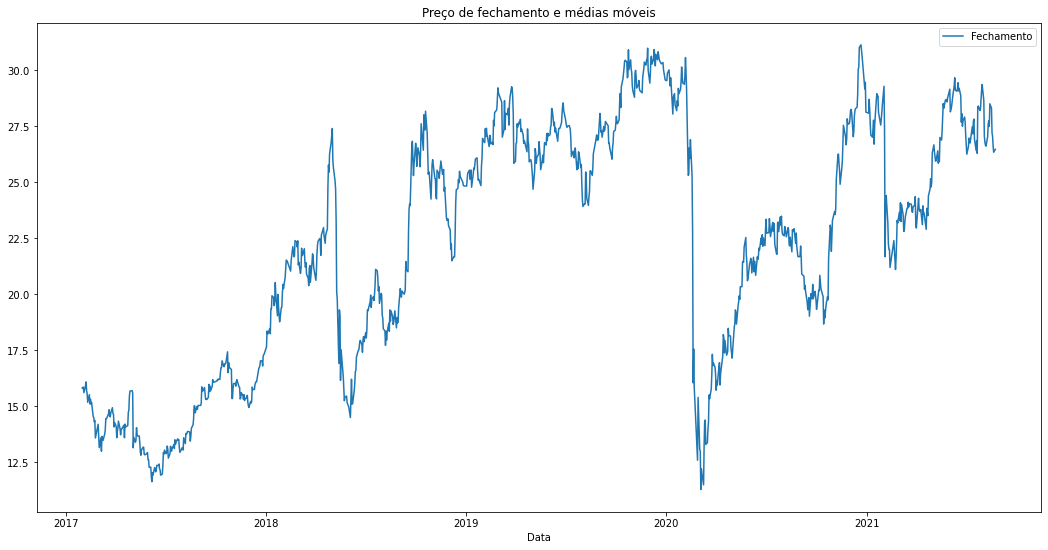

In [39]:
plt.figure(figsize=(18,9))
plt.title('Preço de fechamento e médias móveis')
plt.plot(df_close.Close)
# plt.plot(df_close.mm5D)
# plt.plot(df_close.mm21D)
plt.legend(['Fechamento'])
plt.xlabel('Data')

In [40]:
n_rows = len(df)
rows_train = round(0.7 * n_rows)
rows_test = n_rows - rows_train
rows_validate =  n_rows -1

info = (
    f"linhas treino= 0:{rows_train}"
    f" linhas teste= {rows_train}:{rows_train + rows_test}"
    f" linhas validação= {rows_validate}:{n_rows}"
)

info

'linhas treino= 0:813 linhas teste= 813:1161 linhas validação= 1160:1161'

In [41]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_close)
df_scaled

array([[-1.17912073],
       [-1.17540137],
       [-1.17168219],
       ...,
       [ 0.82556919],
       [ 0.77535888],
       [ 0.79953402]])

In [42]:
train = df_scaled[:rows_train]
test = df_scaled[rows_train : rows_train + rows_test]
print(len(train))
print(len(test))

813
318


In [43]:
def create_df(df, steps=1):
    dataX, dataY = [], []
    for i in range(len(df)-steps-1):
        a = df[i:(i+steps), 0 ]
        dataX.append(a)
        dataY.append(df[i + steps, 0 ])
    return np.array(dataX), np.array(dataY)

In [44]:
steps = 15
X_train, Y_train = create_df(train, steps)
X_test, Y_test = create_df(test, steps)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
X_train

(797, 15)
(797,)
(302, 15)
(302,)


array([[-1.17912073, -1.17540137, -1.17168219, ..., -1.31301454,
        -1.29813745, -1.41529467],
       [-1.17540137, -1.17168219, -1.21817314, ..., -1.29813745,
        -1.41529467, -1.4245929 ],
       [-1.17168219, -1.21817314, -1.16052428, ..., -1.41529467,
        -1.4245929 , -1.45992594],
       ...,
       [-0.91319244, -0.73652668, -0.76442154, ..., -0.93178889,
        -0.67329896, -0.64726414],
       [-0.73652668, -0.76442154, -0.8890173 , ..., -0.67329896,
        -0.64726414, -0.53196678],
       [-0.76442154, -0.8890173 , -0.78487732, ..., -0.64726414,
        -0.53196678, -0.55242256]])

In [45]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) #o ultimo parametro representa a quantidade de features que o modelo recebe(int)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [46]:
model = Sequential()
model.add(LSTM(35, return_sequences=True, input_shape = (steps, 1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))

In [47]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 35)            5180      
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 35)            9940      
_________________________________________________________________
lstm_2 (LSTM)                (None, 35)                9940      
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 36        
Total params: 25,096
Trainable params: 25,096
Non-trainable params: 0
_________________________________________________________________


In [48]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                       patience=40, min_delta=0.0001)

validation = model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs=1000, batch_size=15, verbose=2, callbacks=[es])

Epoch 1/300
54/54 - 4s - loss: 0.3584 - val_loss: 0.0885
Epoch 2/300
54/54 - 1s - loss: 0.1480 - val_loss: 0.0837
Epoch 3/300
54/54 - 1s - loss: 0.1132 - val_loss: 0.0531
Epoch 4/300
54/54 - 1s - loss: 0.0894 - val_loss: 0.0618
Epoch 5/300
54/54 - 1s - loss: 0.0678 - val_loss: 0.0470
Epoch 6/300
54/54 - 1s - loss: 0.0624 - val_loss: 0.0416
Epoch 7/300
54/54 - 1s - loss: 0.0587 - val_loss: 0.0424
Epoch 8/300
54/54 - 1s - loss: 0.0597 - val_loss: 0.0346
Epoch 9/300
54/54 - 1s - loss: 0.0505 - val_loss: 0.0337
Epoch 10/300
54/54 - 1s - loss: 0.0473 - val_loss: 0.0349
Epoch 11/300
54/54 - 1s - loss: 0.0443 - val_loss: 0.0317
Epoch 12/300
54/54 - 1s - loss: 0.0464 - val_loss: 0.0311
Epoch 13/300
54/54 - 1s - loss: 0.0460 - val_loss: 0.0291
Epoch 14/300
54/54 - 1s - loss: 0.0422 - val_loss: 0.0269
Epoch 15/300
54/54 - 1s - loss: 0.0390 - val_loss: 0.0247
Epoch 16/300
54/54 - 1s - loss: 0.0400 - val_loss: 0.0243
Epoch 17/300
54/54 - 1s - loss: 0.0368 - val_loss: 0.0233
Epoch 18/300
54/54 - 1s

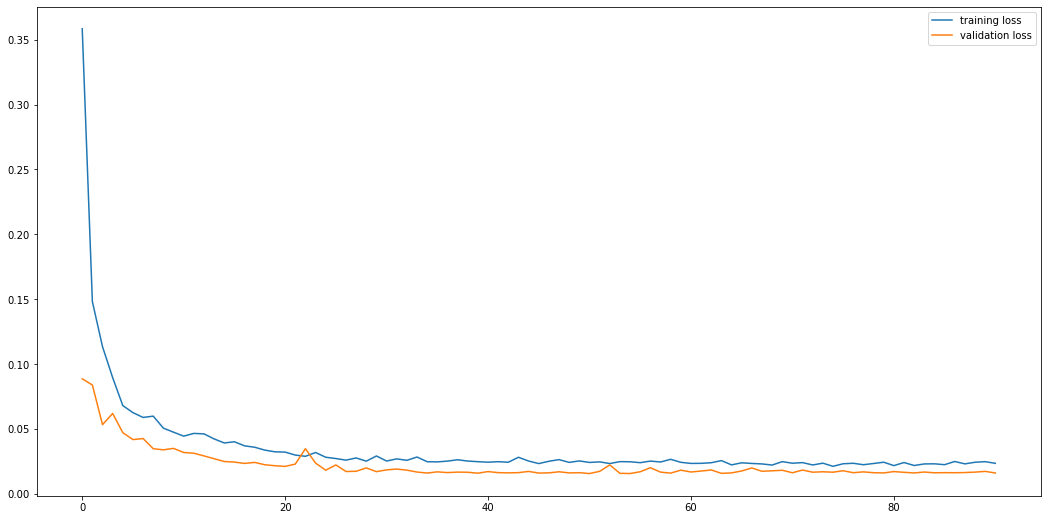

In [49]:
plt.figure(figsize=(18,9))
plt.plot(validation.history['loss'], label = 'training loss')
plt.plot(validation.history['val_loss'], label = 'validation loss')
plt.legend()

In [50]:
prev = model.predict(X_test)
prev = scaler.inverse_transform(prev)

In [51]:
length_test = len(test)
# pegar os ultimos 15 dias que são os tamanho do step
days_input_steps = length_test - steps

input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps


array([[0.90553368, 0.86090241, 0.83300756, 0.82556919, 0.903674  ,
        1.00781363, 1.03570813, 0.99107686, 1.17704066, 1.14170744,
        0.93528786, 0.90739336, 0.82556919, 0.77535888, 0.79953402]])

In [52]:
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[0.9055336812887976,
 0.8609024111681035,
 0.8330075569820902,
 0.825569189310877,
 0.903674000696543,
 1.0078136309781627,
 1.035708130466371,
 0.9910768603456768,
 1.1770406631974715,
 1.141707441340245,
 0.9352878613692603,
 0.9073933618810521,
 0.825569189310877,
 0.7753588774134192,
 0.7995340157171182]

In [53]:
pred_output = []
i = 0
n_future = 10
while(i<n_future):
    
    if(len(list_output_steps) > steps):
       input_steps = np.array(list_output_steps[1:])
       print('{} dia. Valores de entrada -> {}'.format(i, input_steps))
       input_steps = input_steps.reshape(1, -1)
       input_steps = input_steps.reshape((1,steps, 1))
       pred = model.predict(input_steps, verbose = 0)
       print('{} dia. Valor previsto -> {}'.format(i, pred))
       list_output_steps.extend(pred[0].tolist())
       list_output_steps = list_output_steps[1:]
       pred_output.extend(pred.tolist())
       i = i+1
    else:
       input_steps = input_steps.reshape((1, steps, 1))
       pred = model.predict(input_steps, verbose = 0)
       print(pred[0])
       list_output_steps.extend(pred[0].tolist())
       print(len(list_output_steps))
       pred_output.extend(pred.tolist())
       i = i + 1
print(pred_output)


[0.8329532]
16
1 dia. Valores de entrada -> [0.86090241 0.83300756 0.82556919 0.903674   1.00781363 1.03570813
 0.99107686 1.17704066 1.14170744 0.93528786 0.90739336 0.82556919
 0.77535888 0.79953402 0.83295321]
1 dia. Valor previsto -> [[0.8613403]]
2 dia. Valores de entrada -> [0.83300756 0.82556919 0.903674   1.00781363 1.03570813 0.99107686
 1.17704066 1.14170744 0.93528786 0.90739336 0.82556919 0.77535888
 0.79953402 0.83295321 0.86134028]
2 dia. Valor previsto -> [[0.8814368]]
3 dia. Valores de entrada -> [0.82556919 0.903674   1.00781363 1.03570813 0.99107686 1.17704066
 1.14170744 0.93528786 0.90739336 0.82556919 0.77535888 0.79953402
 0.83295321 0.86134028 0.88143682]
3 dia. Valor previsto -> [[0.8957344]]
4 dia. Valores de entrada -> [0.903674   1.00781363 1.03570813 0.99107686 1.17704066 1.14170744
 0.93528786 0.90739336 0.82556919 0.77535888 0.79953402 0.83295321
 0.86134028 0.88143682 0.89573443]
4 dia. Valor previsto -> [[0.9079051]]
5 dia. Valores de entrada -> [1.00781

In [54]:
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev

[26.63970716967944,
 26.792355530633703,
 26.90042247776462,
 26.97730628171784,
 27.042752740813896,
 27.113277478463836,
 27.19742933622215,
 27.295526267403993,
 27.40330667193032,
 27.51692946862278]

In [58]:
dates = pd.to_datetime(df['data_pregao'])
predict_dates = pd.date_range(list(dates)[-1] + pd.DateOffset(2), periods = 10, freq = 'b').tolist()

[Timestamp('2021-09-08 00:00:00', freq='B'),
 Timestamp('2021-09-09 00:00:00', freq='B'),
 Timestamp('2021-09-10 00:00:00', freq='B'),
 Timestamp('2021-09-13 00:00:00', freq='B'),
 Timestamp('2021-09-14 00:00:00', freq='B'),
 Timestamp('2021-09-15 00:00:00', freq='B'),
 Timestamp('2021-09-16 00:00:00', freq='B'),
 Timestamp('2021-09-17 00:00:00', freq='B'),
 Timestamp('2021-09-20 00:00:00', freq='B'),
 Timestamp('2021-09-21 00:00:00', freq='B')]

In [57]:
forecast_dates = []
for i in predict_dates:
    forecast_dates.append(i.date())
df_forecast = pd.DataFrame({'data_pregao': np.array(forecast_dates), 'Close': list_output_prev})
df_forecast = df_forecast.set_index(pd.DatetimeIndex(df_forecast['data_pregao'].values))
df_forecast.drop('data_pregao', axis=1, inplace=True)
df_forecast

,Close
2021-09-08,26.639707
2021-09-09,26.792356
2021-09-10,26.900422
2021-09-13,26.977306
2021-09-14,27.042753
2021-09-15,27.113277
2021-09-16,27.197429
2021-09-17,27.295526
2021-09-20,27.403307
2021-09-21,27.516929


In [59]:
df_2021 = df[ (df['data_pregao'] > '2021-01-01')]
df_2021_close = df_2021[['data_pregao', 'Close']]
df_2021_close = df_2021_close.set_index(pd.DatetimeIndex(df_2021_close['data_pregao'].values))
df_2021_close.drop('data_pregao', axis= 1, inplace=True)
df_2021_close

,Close
2021-01-04,28.910000
2021-01-05,30.040001
2021-01-06,30.100000
2021-01-07,31.000000
2021-01-08,31.120001
...,...
2021-08-31,27.190001
2021-09-01,27.040001
2021-09-02,26.600000
2021-09-03,26.330000


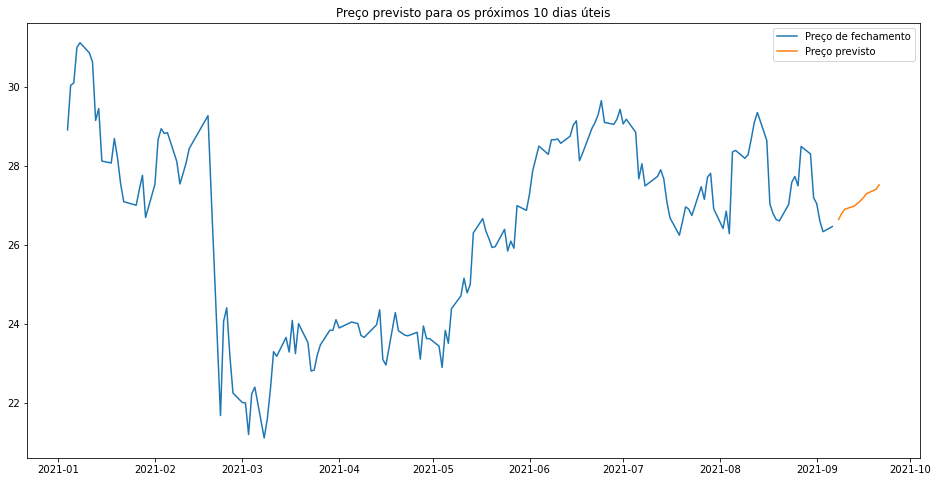

In [60]:
plt.figure(figsize=(16,8))
plt.plot(df_2021_close['Close'])
plt.plot(df_forecast['Close'])
plt.legend(['Preço de fechamento', 'Preço previsto'])
plt.title('Preço previsto para os próximos 10 dias úteis')
plt.show()